# Pulizia dei dati

> Installazione dipendenze necessarie

In [1]:
!pip install langdetect

In [2]:
import pandas as pd
from langdetect import detect
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
csv_path = '/content/drive/MyDrive/Progetto_FDSML/tiktok_accounts.csv'
df = pd.read_csv(csv_path)
df.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,signature,stitchSetting,uniqueId,verified,fake
0,279,0,564,0,0,0,0,0,Tik Toker,False,No bio yet,0,gyzituvigy542,False,True
1,1198,71,9980,0,0,0,0,0,BEULAH,True,NaN,0,tshphjtowl2401583tbww,False,True
2,2968,596,1123,2062,266,0,0,0,Lello27,False,NaN,0,aristanismamojadanuoro,False,False
3,2351,200,818,435,36,0,0,0,clemevitale,False,NaN,0,clemevitale,False,False
4,40300,1100000,52,10000000,720,0,3,1,Saher Monther,False,YouTuber star ⭐️,0,sahermonther,True,False


Divisione attributi:
*   *diggCount*, *followerCount*, *signature*, e *downloadSetting* (Annalaura)
*   *followingCount*, *heartCount*, *videoCount*, *duetSetting* e *stitchSetting* (Raffaele)

In [7]:
selected_data = df[['diggCount', 'followerCount', 'followingCount', 'heartCount',
                      'videoCount', 'commentSetting', 'downloadSetting', 'duetSetting', 'stitchSetting', 'fake']] # Include the 'fake' column here
corr_matrix = selected_data.corr()
corr_matrix['fake'].sort_values(ascending=False)

fake               1.000000
followingCount     0.250169
commentSetting    -0.067205
followerCount     -0.102048
heartCount        -0.104520
duetSetting       -0.186717
stitchSetting     -0.190654
diggCount         -0.204800
videoCount        -0.210097
downloadSetting   -0.227304
Name: fake, dtype: float64

# Esplorazione dei dati

In [7]:
len(df)

10043

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        10043 non-null  int64 
 1   followerCount    10043 non-null  int64 
 2   followingCount   10043 non-null  int64 
 3   heartCount       10043 non-null  int64 
 4   videoCount       10043 non-null  int64 
 5   commentSetting   10043 non-null  int64 
 6   downloadSetting  10043 non-null  int64 
 7   duetSetting      10043 non-null  int64 
 8   nickname         10043 non-null  object
 9   openFavorite     10043 non-null  bool  
 10  signature        6536 non-null   object
 11  stitchSetting    10043 non-null  int64 
 12  uniqueId         10043 non-null  object
 13  verified         10043 non-null  bool  
 14  fake             10043 non-null  bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 971.1+ KB


In [9]:
df.describe()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,stitchSetting
count,10043.000000,1.004300e+04,10043.000000,1.004300e+04,10043.000000,10043.000000,10043.000000,10043.000000,10043.000000
mean,3893.421189,2.218839e+05,1043.106641,3.978432e+06,66.211889,0.009161,0.146968,0.089316,0.093100
std,17247.832989,2.177557e+06,2186.721075,3.812251e+07,311.690438,0.136519,0.647570,0.479087,0.489071
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,195.000000,2.000000e+00,176.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,358.000000,5.400000e+01,533.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,761.000000,5.120000e+02,686.000000,9.060000e+02,17.000000,0.000000,0.000000,0.000000,0.000000
max,386100.000000,8.230000e+07,10000.000000,1.400000e+09,9300.000000,3.000000,3.000000,3.000000,3.000000


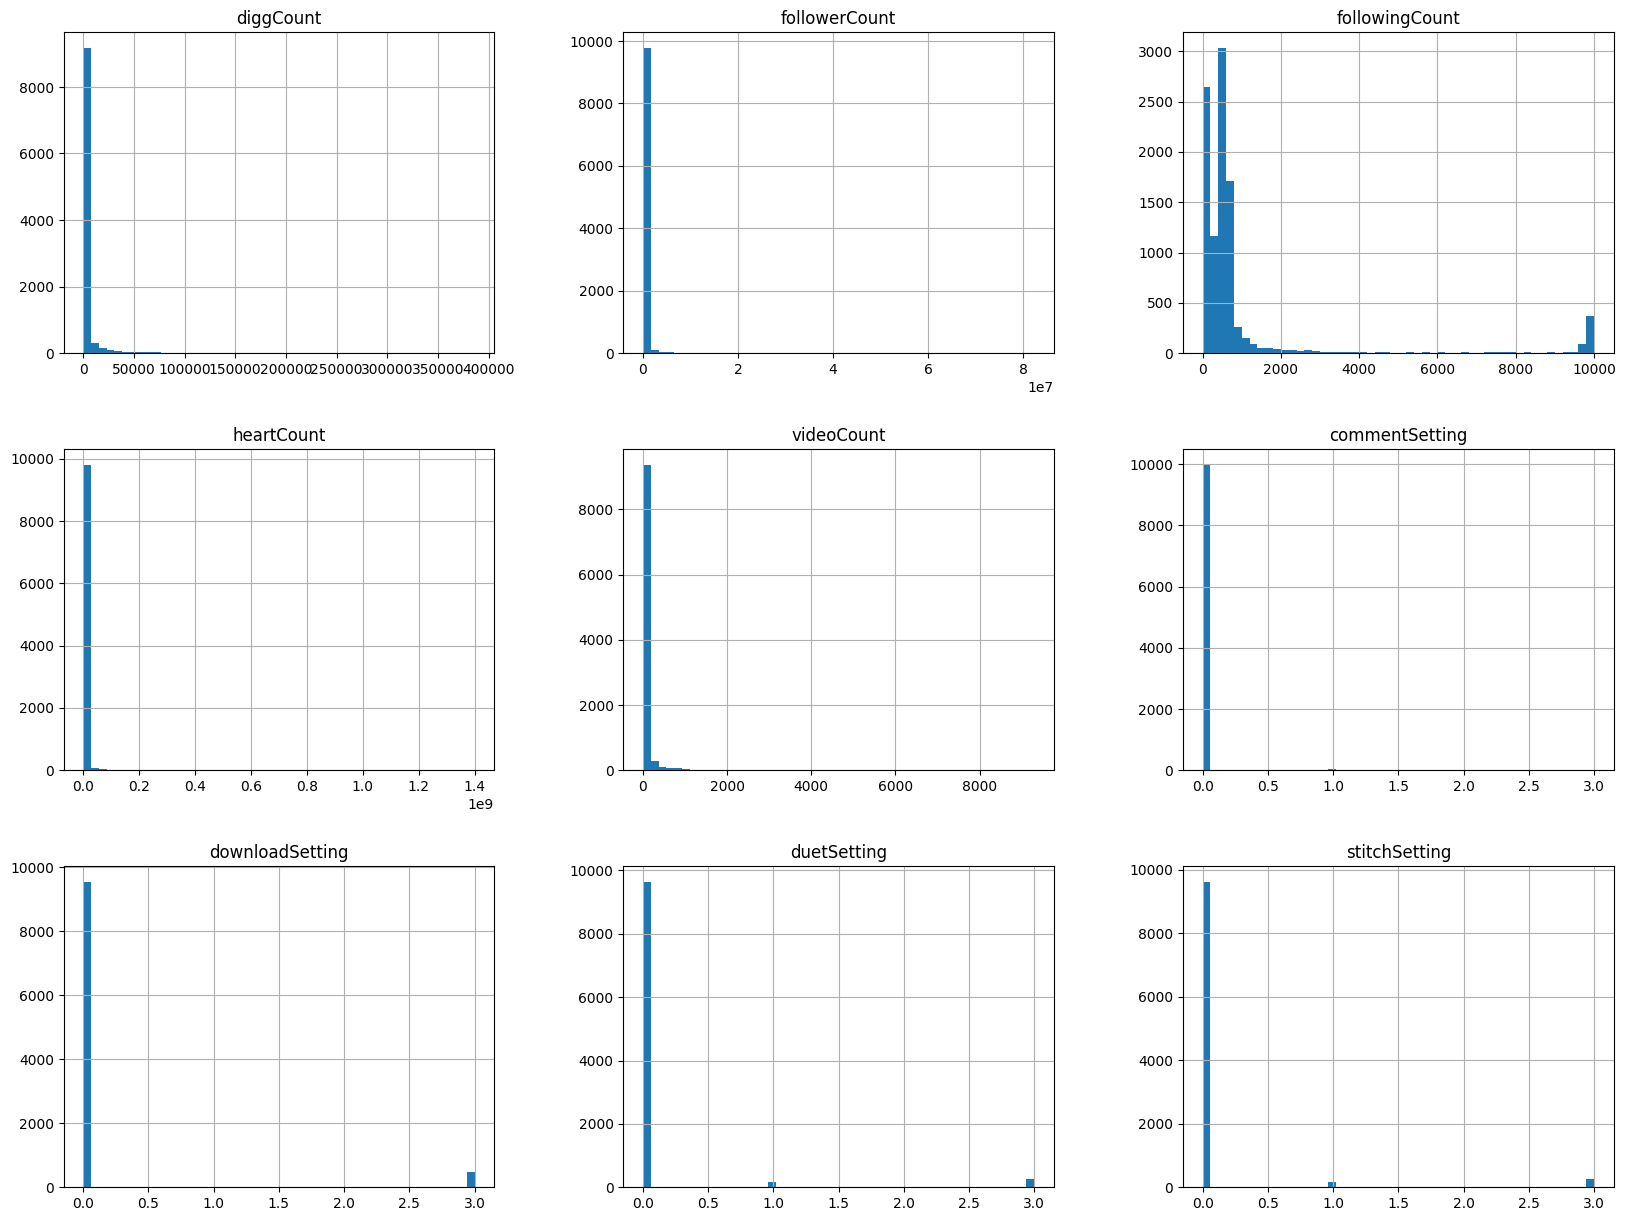

In [10]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
print("Massimo Heart Count:", df['heartCount'].max())
print("Minimo Heart Count:", df['heartCount'].min())

Massimo Digg Count: 1400000000
Minimo Digg Count: 0


# Pulizia *signature*

In [5]:
df['signature'] = df['signature'].fillna('')
df['signature'] = df['signature'].replace('No bio yet', '')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10043 entries, 0 to 10042
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        10043 non-null  int64 
 1   followerCount    10043 non-null  int64 
 2   followingCount   10043 non-null  int64 
 3   heartCount       10043 non-null  int64 
 4   videoCount       10043 non-null  int64 
 5   commentSetting   10043 non-null  int64 
 6   downloadSetting  10043 non-null  int64 
 7   duetSetting      10043 non-null  int64 
 8   nickname         10043 non-null  object
 9   openFavorite     10043 non-null  bool  
 10  signature        10043 non-null  object
 11  stitchSetting    10043 non-null  int64 
 12  uniqueId         10043 non-null  object
 13  verified         10043 non-null  bool  
 14  fake             10043 non-null  bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 971.1+ KB


In [7]:
count = 0

for signature in df['signature']:

  if signature == '':
    continue

  try:
    language = detect(signature)
  except:
    continue

  if language != 'en':
    count += 1

print(count)

1342


In [8]:
for i in range(len(df['signature'])):
  signature = df['signature'][i]

  if signature == '':
    continue

  try:
    language = detect(signature)
  except:
    continue

  if language != 'en':
    df = df.drop(i)

df = df.reset_index(drop=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   diggCount        8703 non-null   int64 
 1   followerCount    8703 non-null   int64 
 2   followingCount   8703 non-null   int64 
 3   heartCount       8703 non-null   int64 
 4   videoCount       8703 non-null   int64 
 5   commentSetting   8703 non-null   int64 
 6   downloadSetting  8703 non-null   int64 
 7   duetSetting      8703 non-null   int64 
 8   nickname         8703 non-null   object
 9   openFavorite     8703 non-null   bool  
 10  signature        8703 non-null   object
 11  stitchSetting    8703 non-null   int64 
 12  uniqueId         8703 non-null   object
 13  verified         8703 non-null   bool  
 14  fake             8703 non-null   bool  
dtypes: bool(3), int64(9), object(3)
memory usage: 841.5+ KB


# Pulizia *diggCount*

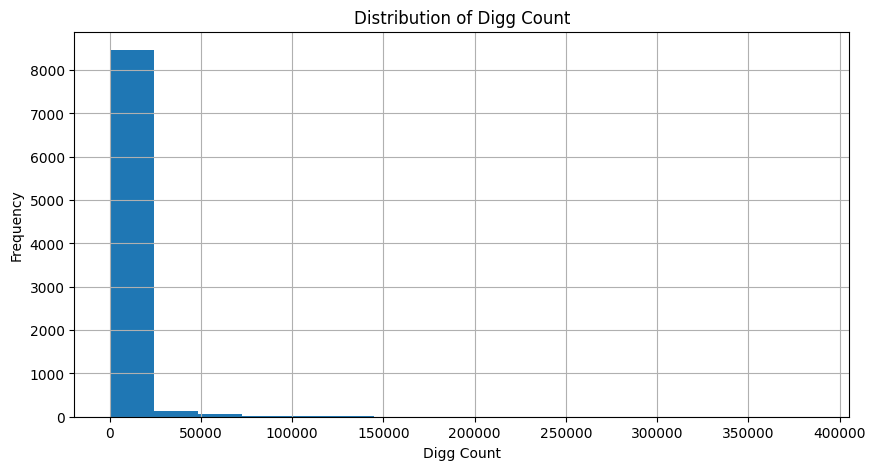

In [10]:
df['diggCount'].hist(bins=16, figsize=(10,5))
plt.xlabel('Digg Count')
plt.ylabel('Frequency')
plt.title('Distribution of Digg Count')
plt.show()

In [11]:
stats = df['diggCount'].describe()
stats

count      8703.000000
mean       2963.168448
std       14532.123449
min           0.000000
25%         213.000000
50%         350.000000
75%         516.000000
max      386100.000000
Name: diggCount, dtype: float64

## Standardizzazione con StandardScaler

In [21]:
scaler = StandardScaler()
# Splitting the independent and dependent variables
data = df[['diggCount', 'followerCount', 'followingCount', 'heartCount', 'videoCount']]
data_scaled = scaler.fit_transform(data)
df_standardized = pd.DataFrame(data_scaled, columns=data.columns)
df_standardized.head()

,diggCount,followerCount,followingCount,heartCount,videoCount
0,-0.184716,-0.086791,-0.242968,-0.089091,-0.200171
1,-0.121474,-0.086756,3.856266,-0.089091,-0.200171
2,0.000332,-0.086498,0.000391,-0.089026,1.090363
3,-0.042128,-0.086692,-0.132390,-0.089077,-0.025512
4,-0.180932,-0.086791,-0.225555,-0.089091,-0.200171


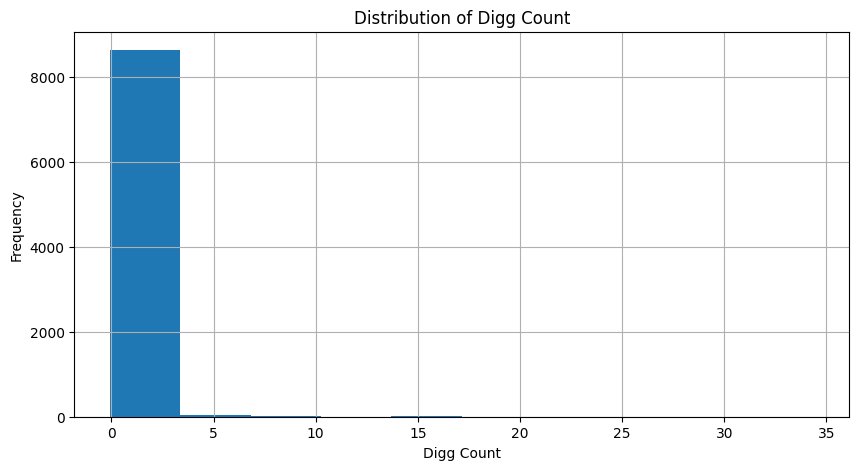

In [25]:
df_standardized['heartCount'].hist(figsize=(10,5))
plt.xlabel('Digg Count')
plt.ylabel('Frequency')
plt.title('Distribution of Digg Count')
plt.show()

In [26]:
print(df_standardized['heartCount'].min())
print(df_standardized['heartCount'].max())

-0.08909111573968811
34.40202593929721


## Quantile Transformation

In [43]:
qt = QuantileTransformer(output_distribution='uniform')
df['quantile_transformed_commentSetting'] = qt.fit_transform(df[['commentSetting']])

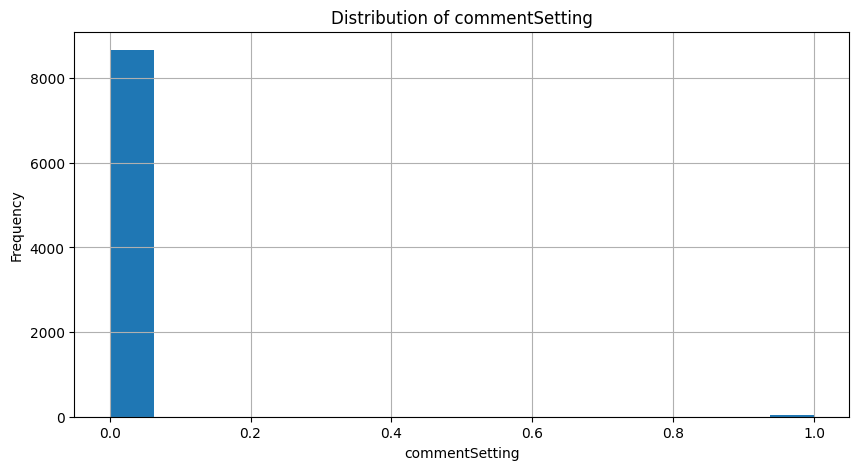

In [44]:
df['quantile_transformed_commentSetting'].hist(bins=16, figsize=(10,5))
plt.xlabel('commentSetting')
plt.ylabel('Frequency')
plt.title('Distribution of commentSetting')
plt.show()

In [45]:
stats = df['quantile_transformed_commentSetting'].describe()
stats

count    8703.000000
mean        0.004473
std         0.066667
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: quantile_transformed_commentSetting, dtype: float64

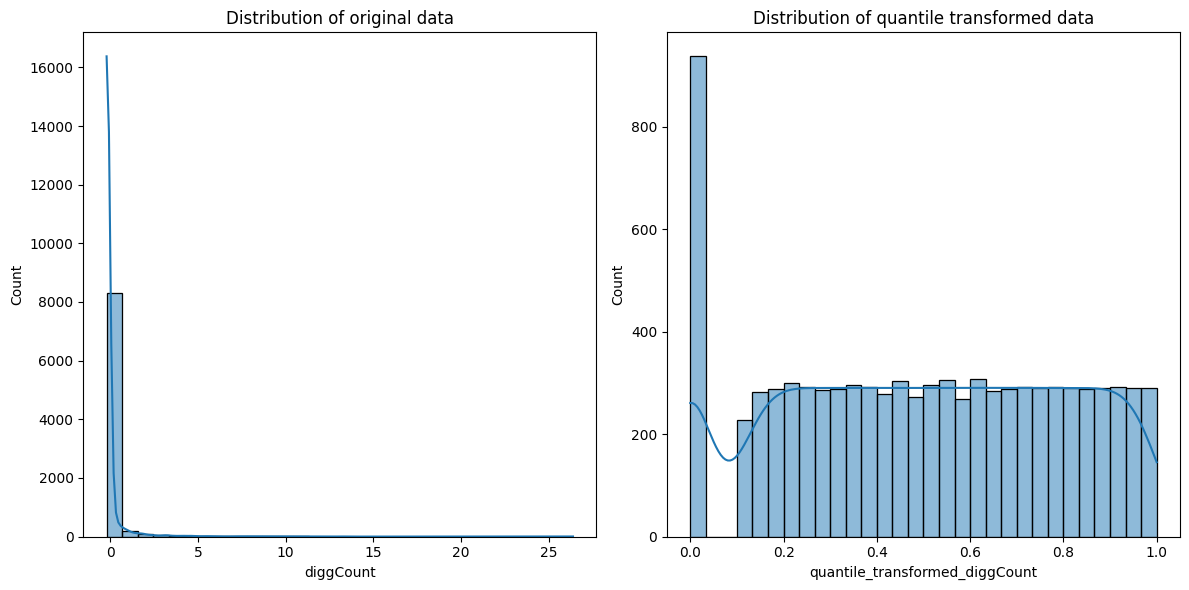

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['diggCount'], bins=30, kde=True)
plt.title('Distribution of original data')

plt.subplot(1, 2, 2)
sns.histplot(df['quantile_transformed_diggCount'], bins=30, kde=True)
plt.title('Distribution of quantile transformed data')

plt.tight_layout()
plt.show()

## Scalatura Min-Max

In [40]:
scaler = MinMaxScaler()
df['scaled_duetSetting'] = scaler.fit_transform(df[['duetSetting']])

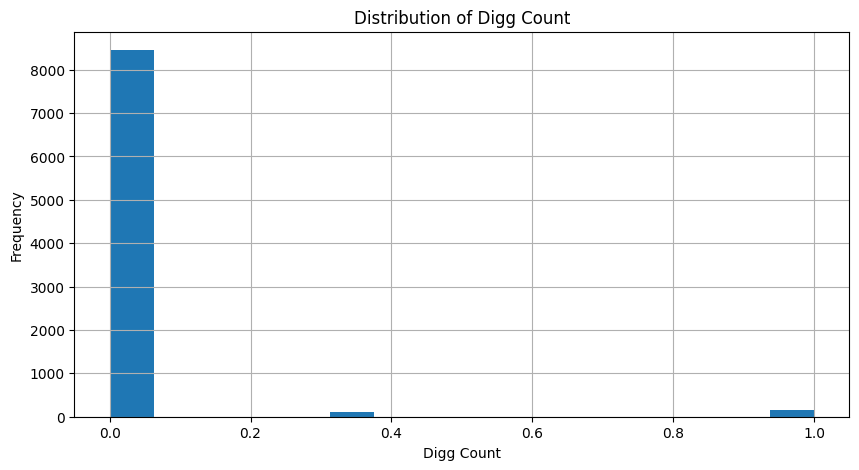

In [41]:
df['scaled_duetSetting'].hist(bins=16, figsize=(10,5))
plt.xlabel('Digg Count')
plt.ylabel('Frequency')
plt.title('Distribution of Digg Count')
plt.show()

In [42]:
stats = df['scaled_duetSetting'].describe()
stats

count    8703.000000
mean        0.021104
std         0.134468
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: scaled_duetSetting, dtype: float64

In [51]:
df.head()

,diggCount,followerCount,followingCount,heartCount,videoCount,commentSetting,downloadSetting,duetSetting,nickname,openFavorite,...,uniqueId,verified,fake,quantile_transformed_diggCount,scaled_diggCount,quantile_transformed_duetSetting,scaled_duetSetting,quantile_transformed_commentSetting,log_diggCount,log_normalized_diggCount
0,-0.184716,0,564,0,0,0,0,0,Tik Toker,False,...,gyzituvigy542,False,True,0.312813,0.000723,0.0,0.0,0.0,-0.204219,0.006737
1,-0.121474,71,9980,0,0,0,0,0,BEULAH,True,...,tshphjtowl2401583tbww,False,True,0.826449,0.003103,0.0,0.0,0.0,-0.129509,0.027857
2,0.000332,596,1123,2062,266,0,0,0,Lello27,False,...,aristanismamojadanuoro,False,False,0.885778,0.007687,0.0,0.0,0.0,0.000332,0.064563
3,-0.042128,200,818,435,36,0,0,0,clemevitale,False,...,clemevitale,False,False,0.872397,0.006089,0.0,0.0,0.0,-0.043041,0.052302
4,-0.180932,0,604,0,0,0,0,0,Tik Toker,False,...,exidyvetoqygyv,False,True,0.451451,0.000865,0.0,0.0,0.0,-0.199588,0.008047
